# Imports

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import math
import cmath
from scipy.io.wavfile import write

class dft(object):
  def __init__(self, x, fs, K = None):
    self.x = x
    self.fs = fs
    self.N = len(x)
    if K == None:
      K = len(self.x)
    self.K = K
    self.f = np.arange(self.K)*self.fs/self.N
    self.f_c = np.arange(-np.ceil(K/2)+1,np.floor(self.K/2)+1)*self.fs/self.K

  def solve(self):
    X = np.fft.fft(self.x, self.K)/np.sqrt(self.N);
    X_c = np.roll(X, np.int(np.ceil(self.K/2-1)))
    return [self.f, X, self.f_c, X_c]

class square():
  def __init__(self, T, T0, fs):
    self.T = T
    self.T0 = T0
    self.fs = fs

  def generate(self):
    Ts = 1/self.fs
    N = math.floor(self.T/Ts)
    M = math.floor(self.T0/Ts)
    x = np.zeros(N)
    for i in range(M):
      x[i] = 1/np.sqrt(M)
    return x, N

class triangle():
  def __init__(self, T, T0, fs):
    self.T = T
    self.T0 = T0
    self.fs = fs

  def generate(self):
    Ts = 1/self.fs
    N = math.floor(self.T/Ts)
    M = math.floor(self.T0/Ts)
    x = np.zeros(N)
    for i in range(np.int(M/2)):
      x[i] = i
      x[M-i-1] = i
    energy = np.linalg.norm(x)
    for i in range(M):
      x[i] = x[i]/energy
    return x, N

class square_wave():
  def __init__(self, T, f0, fs):
    self.T = T
    self.f0 = f0
    self.fs = fs
    self.N = T*fs

  def generate(self):
    n = np.arange(self.N)
    x = np.sign(np.cos(2*cmath.pi*self.f0/self.fs*n))        
    return x, self.N


# Problem **1.1**

In [5]:
class iDFT_base(object): 
  def __init__(self, X, fs): 
    self.X = X
    self.fs = fs
    self.N = 2*(len(self.X)-1)

  def solve(self):
    x = np.zeros(self.N)

    # iDFT is x(n) = sum of (X(k)*e^j2pikn/N)
    Ts = 1/self.fs
    for n in range(self.N):
      x0 = 1/np.sqrt(self.N)*self.X[0]*np.exp(1j*2*cmath.pi*0*n/self.N)
      for k in range(1,int(self.N/2)):
        x[n] = x0 + 1/np.sqrt(self.N)*self.X[k]*np.exp(1j*2*cmath.pi*k*n/self.N)
        x[n] = x[n] + 1/np.sqrt(self.N)*np.conj(self.X[k])*np.exp(-1j*2*cmath.pi*k*n/self.N)      
    T = np.arange(self.N)*Ts
    return x, T


# Problem **1.2**


In [6]:
class idft(object): 
  def __init__(self, X, fs, N, K=None): 
    self.X = X
    self.fs = fs
    self.N = N
    self.K = K
    if K == None:
      self.K = int(len(X)/2)-1


  def solve(self):
    x = np.zeros(self.N)
    for n in range(self.N):
      x[n] = 1/np.sqrt(self.N) * self.X[0] * np.exp(1j*2*cmath.pi*0*n/self.N)
      for k in range(1, self.K+1): 
        x[n] = x[n] + 1/np.sqrt(self.N)*self.X[k]*np.exp(1j*2*cmath.pi*k*n/self.N)
        x[n] = x[n] + 1/np.sqrt(self.N)*np.conj(self.X[k])*np.exp(-1j*2*cmath.pi*k*n/self.N)
    Ts = 1/self.fs
    Treal = np.arange(self.N)*Ts
    return x, Treal


# Problem **1.3**


In [7]:
def q_13(T, fs, T0, Ks):
    sp = square(T, T0, fs)
    x, N = sp.generate()
    DFT = dft(x,fs)
    [f,X,f_c,X_c] = DFT.solve()
    
    iDFT = idft(X, fs, N, Ks[0])
    xhat_K, Treal = iDFT.solve()
    
    # Plots
    fig, axs = plt.subplots(2)
    axs[0].grid()
    axs[1].grid()
    fig.suptitle('Original Signal and the DFT' )
    fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.3)
    axs[0].plot(Treal, x)
    axs[0].set_xlabel('Time (s)')
    axs[0].set_ylabel('Signal')
    axs[1].plot(f_c, abs(X_c))
    axs[1].set_xlabel('Frequency (Hz)')
    axs[1].set_ylabel('DFT')
    plt.show()    
    #fig.savefig("square_DFT.png", bbox_inches='tight')
    
    for K in Ks:
      iDFT = idft(X, fs, N, K)
      xhat_K, Treal = iDFT.solve()
      
      x_diff = x - xhat_K
      energy_diff = np.linalg.norm(x_diff) * np.linalg.norm(x_diff)   
      print('Energy Difference:  %.4f'%(energy_diff))

      plt.figure()
      plt.grid(True)
      plt.title('Reconstructed Signal')
      plt.plot(Treal, x, label='Original')
      plt.plot(Treal, xhat_K, label='Reconstructed')
      plt.legend()
      plt.xlabel('Time (s)')
      plt.ylabel('Signal')
      #plt.savefig('Square_reconstructed.png')
      plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: ComplexWarning: Casting complex values to real discards the imaginary part
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: ComplexWarning: Casting complex values to real discards the imaginary part
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: ComplexWarning: Casting complex values to real discards the imaginary part


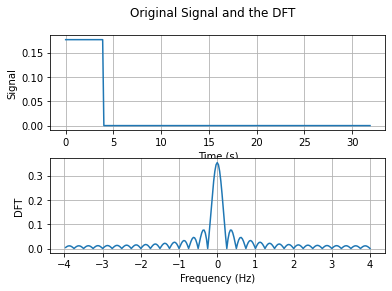

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: ComplexWarning: Casting complex values to real discards the imaginary part
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: ComplexWarning: Casting complex values to real discards the imaginary part
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: ComplexWarning: Casting complex values to real discards the imaginary part


Energy Difference:  0.4349


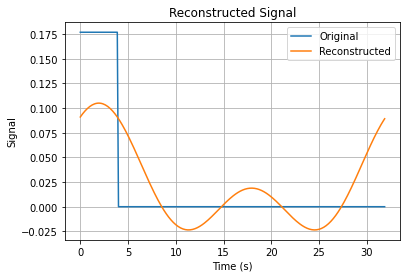

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: ComplexWarning: Casting complex values to real discards the imaginary part
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: ComplexWarning: Casting complex values to real discards the imaginary part
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: ComplexWarning: Casting complex values to real discards the imaginary part


Energy Difference:  0.1797


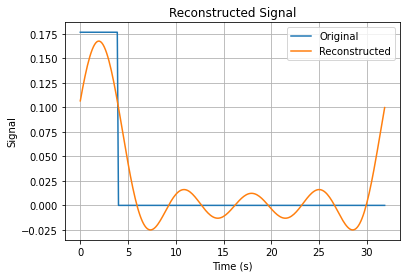

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: ComplexWarning: Casting complex values to real discards the imaginary part
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: ComplexWarning: Casting complex values to real discards the imaginary part
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: ComplexWarning: Casting complex values to real discards the imaginary part


Energy Difference:  0.0968


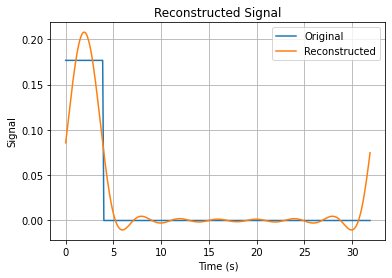

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: ComplexWarning: Casting complex values to real discards the imaginary part
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: ComplexWarning: Casting complex values to real discards the imaginary part
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: ComplexWarning: Casting complex values to real discards the imaginary part


Energy Difference:  0.0494


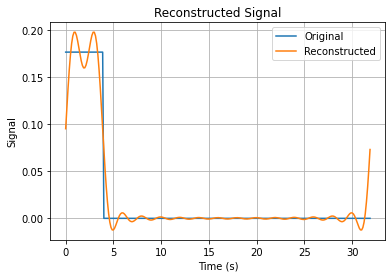

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: ComplexWarning: Casting complex values to real discards the imaginary part
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: ComplexWarning: Casting complex values to real discards the imaginary part
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: ComplexWarning: Casting complex values to real discards the imaginary part


Energy Difference:  0.0239


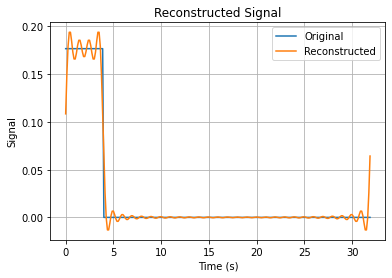

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: ComplexWarning: Casting complex values to real discards the imaginary part
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: ComplexWarning: Casting complex values to real discards the imaginary part
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: ComplexWarning: Casting complex values to real discards the imaginary part


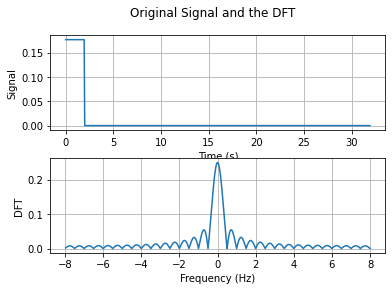

Energy Difference:  0.6954


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: ComplexWarning: Casting complex values to real discards the imaginary part
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: ComplexWarning: Casting complex values to real discards the imaginary part
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: ComplexWarning: Casting complex values to real discards the imaginary part


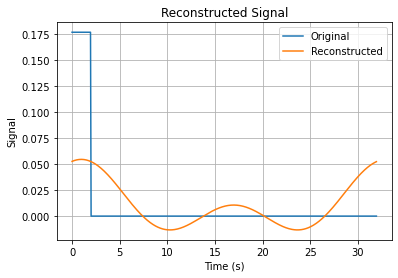

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: ComplexWarning: Casting complex values to real discards the imaginary part
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: ComplexWarning: Casting complex values to real discards the imaginary part
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: ComplexWarning: Casting complex values to real discards the imaginary part


Energy Difference:  0.4828


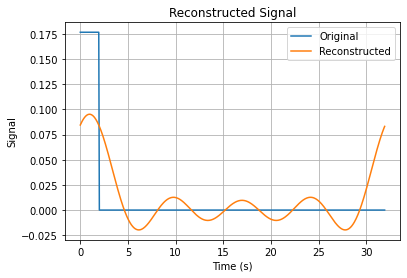

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: ComplexWarning: Casting complex values to real discards the imaginary part
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: ComplexWarning: Casting complex values to real discards the imaginary part
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: ComplexWarning: Casting complex values to real discards the imaginary part


Energy Difference:  0.2018


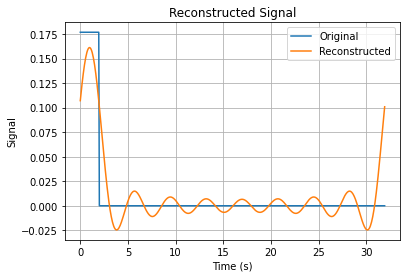

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: ComplexWarning: Casting complex values to real discards the imaginary part
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: ComplexWarning: Casting complex values to real discards the imaginary part
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: ComplexWarning: Casting complex values to real discards the imaginary part


Energy Difference:  0.0969


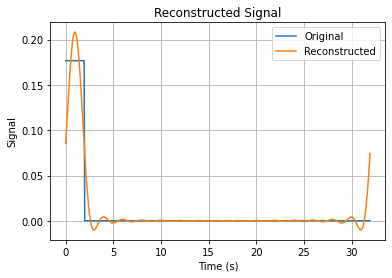

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: ComplexWarning: Casting complex values to real discards the imaginary part
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: ComplexWarning: Casting complex values to real discards the imaginary part
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: ComplexWarning: Casting complex values to real discards the imaginary part


Energy Difference:  0.0494


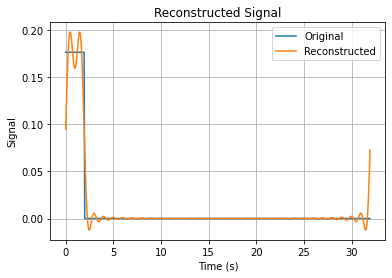

In [8]:
if __name__ == '__main__':
  Ks = [2, 4, 8, 16, 32]
  duration_of_signal = 32
  sampling_frequency1 = 8
  sampling_duration1 = 4
  q_13(duration_of_signal, sampling_frequency1, sampling_duration1, Ks)
  sampling_frequency2 = 16
  sampling_duration2 = 2
  q_13(duration_of_signal, sampling_frequency2, sampling_duration2, Ks)

# Problem **1.4**


In [11]:
def q_14(T, fs, T0, Ks):
    tp = triangle(T, T0, fs)
    x, N = tp.generate()
    DFT = dft(x,fs)
    [f,X,f_c,X_c] = DFT.solve()
    
    iDFT = idft(X, fs, N, Ks[0])
    xhat_K, Treal = iDFT.solve()
    
    # Plots
    fig, axs = plt.subplots(2)
    axs[0].grid()
    axs[1].grid()
    fig.suptitle('Original Signal and the DFT' )
    fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.3)
    axs[0].plot(Treal, x)
    axs[0].set_xlabel('Time (s)')
    axs[0].set_ylabel('Signal')
    axs[1].plot(f_c, abs(X_c))
    axs[1].set_xlabel('Frequency (Hz)')
    axs[1].set_ylabel('DFT')
    plt.show()    
    #fig.savefig("square_DFT.png", bbox_inches='tight')
    
    for K in Ks:
      iDFT = idft(X, fs, N, K)
      xhat_K, Treal = iDFT.solve()
      
      x_diff = x - xhat_K
      energy_diff = np.linalg.norm(x_diff) * np.linalg.norm(x_diff)   
      print('Energy Difference:  %.4f'%(energy_diff))

      plt.figure()
      plt.grid(True)
      plt.title('Reconstructed Signal')
      plt.plot(Treal, x, label='Original')
      plt.plot(Treal, xhat_K, label='Reconstructed')
      plt.legend()
      plt.xlabel('Time (s)')
      plt.ylabel('Signal')
      #plt.savefig('Square_reconstructed.png')
      plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: ComplexWarning: Casting complex values to real discards the imaginary part
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: ComplexWarning: Casting complex values to real discards the imaginary part
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: ComplexWarning: Casting complex values to real discards the imaginary part


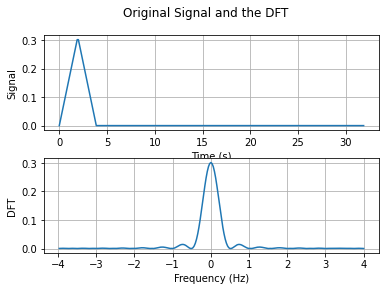

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: ComplexWarning: Casting complex values to real discards the imaginary part
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: ComplexWarning: Casting complex values to real discards the imaginary part
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: ComplexWarning: Casting complex values to real discards the imaginary part


Energy Difference:  0.5674


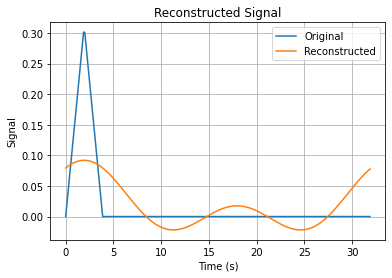

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: ComplexWarning: Casting complex values to real discards the imaginary part
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: ComplexWarning: Casting complex values to real discards the imaginary part
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: ComplexWarning: Casting complex values to real discards the imaginary part


Energy Difference:  0.2991


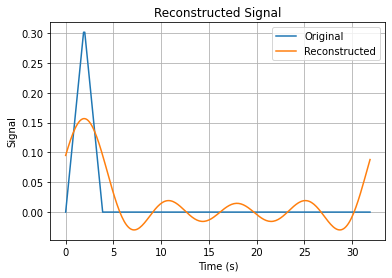

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: ComplexWarning: Casting complex values to real discards the imaginary part
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: ComplexWarning: Casting complex values to real discards the imaginary part
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: ComplexWarning: Casting complex values to real discards the imaginary part


Energy Difference:  0.0429


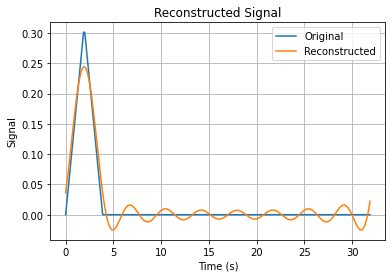

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: ComplexWarning: Casting complex values to real discards the imaginary part
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: ComplexWarning: Casting complex values to real discards the imaginary part
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: ComplexWarning: Casting complex values to real discards the imaginary part


Energy Difference:  0.0029


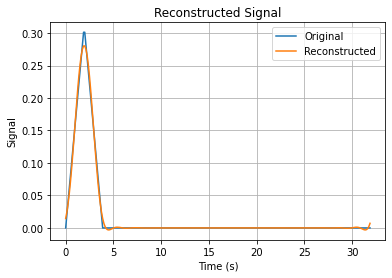

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: ComplexWarning: Casting complex values to real discards the imaginary part
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: ComplexWarning: Casting complex values to real discards the imaginary part
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: ComplexWarning: Casting complex values to real discards the imaginary part


Energy Difference:  0.0004


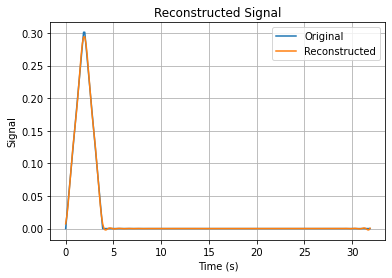

In [12]:
if __name__ == '__main__':
  Ks = [2, 4, 8, 16, 32]
  duration_of_signal = 32
  sampling_frequency = 8
  sampling_duration = 4
  q_14(duration_of_signal, sampling_frequency, sampling_duration, Ks)

# Problem **1.6**


In [ ]:
class new_dft():
  def __init__(self, x, fs, K):
    self.x = x
    self.fs = fs
    self.N = len(self.x)
    self.K = K

  def solve(self):
    X = np.zeros(self.N, dtype=np.complex)
    E = np.zeros(self.N)
    X_K = np.zeros(self.K, dtype=np.complex)
    index = np.zeros(self.K)
    for k in range(self.N):
      for n in range(self.N):
        X[k] = X[k] + 1/np.sqrt(self.N)*self.x[n]*np.exp(-1j*2*cmath.pi*k*n/self.N)
    fk = np.arange(self.N)/self.N*self.fs
    
    for k in range(self.N):
      E[k] = abs(X[k])
    index_temp = np.argsort(-E)
    index = index_temp[0:self.K]
    index = index[:,np.newaxis]
    X_K = X[index]
    X_K = np.concatenate((X_K,index), axis=1)
    return X_K, fk

# Problem **1.8**


In [ ]:
class reconstruction():
  def __init__(self, X_k, fk):
    self.X = X_k
    self.fk = fk
    self.N = len(fk)
    self.K = self.X.shape[0]
  
  def solve(self):
    x = np.zeros(self.N)
    for n in range(self.N):
      for k in range(self.K):
        x[n] = x[n] + 1/np.sqrt(self.N)*self.X[k,0]*np.exp(1j*2*cmath.pi*self.X[k,1]*n/self.N)
    return x

# Problem **1.9**


In [ ]:
def q_19(T, fs, f0, Ks):
  sp = square_wave(T, f0, fs)
  x, N = sp.generate()
  DFT = dft(x, fs)
  [f, X, f_c, X_c] = DFT.solve()

  DFT_K = new_dft(x, fs, Ks[0])
  X_K, fk = DFT_K.solve()
  
  iDFT = reconstruction(X_K, fk)
  xhat_K = iDFT.solve()
  
  Ts = 1/fs
  Treal = np.arange(N)*Ts

  # Plot
  fig, axs = plt.subplots(2)
  axs[0].grid()
  axs[1].grid()
  fig.suptitle('Original Signal and its DFT')
  fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.3)
  axs[0].plot(Treal, x)
  axs[0].set_xlabel('Time (s)')
  axs[0].set_ylabel('Signal')
  axs[1].plot(f_c, abs(X_c))
  axs[1].set_xlabel('Frequency (Hz)')
  axs[1].set_ylabel('DFT')
  #fig.savefig("Square_Wave_DFT.png")
  plt.show()
  
  for K in Ks:
    DFT_K = new_dft(x, fs, K)
    X_K, fk = DFT_K.solve()
    
    iDFT = reconstruction(X_K, fk)
    xhat_K = iDFT.solve()
    
    Ts = 1/fs
    Treal = np.arange(N)*Ts

    x_diff = x - xhat_K
    energy_diff = np.linalg.norm(x_diff) * np.linalg.norm(x_diff)   
    print('K='+ str(K) +' Energy Difference:  %.4f'%(energy_diff))

    plt.figure()
    plt.grid(True)
    plt.title('Reconstructed Signal')
    plt.plot(Treal, xhat_K)
    plt.xlabel('Time (s)')
    plt.ylabel('Signal')
    #plt.savefig('Square_Wave_reconstructed.png')
    plt.show()
  

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: ComplexWarning: Casting complex values to real discards the imaginary part
  if sys.path[0] == '':


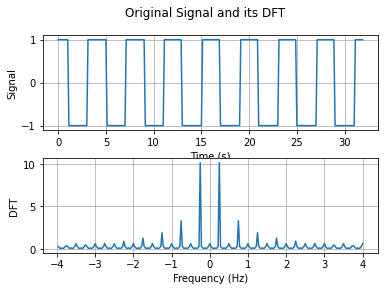

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: ComplexWarning: Casting complex values to real discards the imaginary part
  if sys.path[0] == '':


K=2 Energy Difference:  49.5450


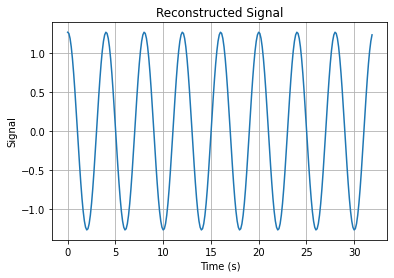

K=4 Energy Difference:  27.5292


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: ComplexWarning: Casting complex values to real discards the imaginary part
  if sys.path[0] == '':


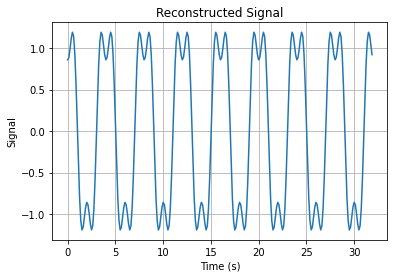

K=8 Energy Difference:  16.9969


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: ComplexWarning: Casting complex values to real discards the imaginary part
  if sys.path[0] == '':


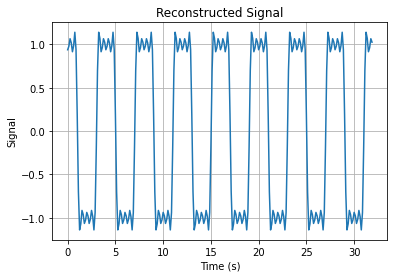

K=16 Energy Difference:  12.5628


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: ComplexWarning: Casting complex values to real discards the imaginary part
  if sys.path[0] == '':


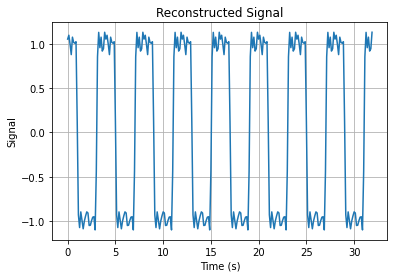

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: ComplexWarning: Casting complex values to real discards the imaginary part
  if sys.path[0] == '':


K=30 Energy Difference:  7.8007


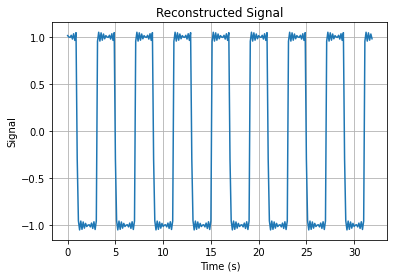

In [ ]:
if __name__ == '__main__':
  Ks = [2, 4, 8, 16, 30]
  duration_of_signal = 32
  frequency = 8
  sampling_frequency = 0.25
  q_19(duration_of_signal, frequency, sampling_frequency, Ks)

# Section 2.1

In [13]:
def q_21(T, fs):
    voice = recordsound(T, fs)
    x = voice.solve().reshape(T*fs)
    N = len(x)

    DFT = dft(x,fs)
    [freqs, X, f_c, X_c] = DFT.solve()

    Ts= 1/fs
    Treal= np.arange(N)*Ts

    fig, axs = plt.subplots(2)
    axs[0].grid()
    axs[1].grid()
    fig.suptitle('Original Voice and its DFT' )
    fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.3)
    axs[0].plot(Treal, x)
    axs[0].set_xlabel('Time (s)')
    axs[0].set_ylabel('Signal')
    axs[1].plot(f_c, X_c)
    axs[1].set_xlabel('Frequency (Hz)')
    axs[1].set_ylabel('DFT')
    plt.show()

# Section 2.2

In [14]:
# Use built-in idft function 
class idft():
    def __init__(self, X, fs, N, K=None):
        self.X=X
        self.fs=fs
        self.N=N
        self.K=K
        if self.K==None:
            self.K=int(len(X)/2)-1
    def solve_ifft(self):
        x=np.fft.ifft(self.X,self.N)*np.sqrt(self.N)

        Ts= 1/self.fs
        Treal= np.arange(self.N)*Ts

        return x, Treal


# Helpers are for the two different compressions: one using the first K DFT 
# coefficients and the second using the last N/2 DFT coefficients. 
# Since we want to look at multiple gamma (factors) values, we use the helper 
# functions to help us analyze the same recording of the voice. 

def q_22_1_test_all(T, fs, gamma1, gamma2, gamma3, gamma4, gamma5, gamma6, 
                    gamma7, gamma8, gamma9, gamma10, gamma11):
    myvoice = recordsound(T, fs)
    x = myvoice.solve().reshape(T*fs)
    N = len(x)

    DFT = dft(x,fs)
    [freqs, X, f_c, X_c] = DFT.solve()

    q_22_1_test_all_helper(X, x, N, fs, gamma1)
    q_22_1_test_all_helper(X, x, N, fs, gamma2)
    q_22_1_test_all_helper(X, x, N, fs, gamma3)
    q_22_1_test_all_helper(X, x, N, fs, gamma4)
    q_22_1_test_all_helper(X, x, N, fs, gamma5)
    q_22_1_test_all_helper(X, x, N, fs, gamma6)
    q_22_1_test_all_helper(X, x, N, fs, gamma7)
    q_22_1_test_all_helper(X, x, N, fs, gamma8)
    q_22_1_test_all_helper(X, x, N, fs, gamma9)
    q_22_1_test_all_helper(X, x, N, fs, gamma10)
    q_22_1_test_all_helper(X, x, N, fs, gamma11)

def q_22_1_test_all_helper(X, x, N, fs, gamma):
    truncated_sample = int(N/gamma)
    X_truncated = np.zeros(N, dtype=np.complex)
    X_truncated[0:truncated_sample] = X[0:truncated_sample]

    iDFT = idft(X_truncated, fs, N)
    xhat_K, Treal = iDFT.solve_ifft()

    write('myvoice_truncated.wav', fs, xhat_K.real)

    # Plot
    fig, axs = plt.subplots(2)
    axs[0].grid()
    axs[1].grid()
    fig.suptitle('Original Voice and Reconstructed Voice' 
                 + " (Compression Factor=" + (str(gamma)) + ")")
    fig.subplots_adjust(left=None, bottom=None, right=None, top=None, 
                        wspace=None, hspace=0.3)
    axs[0].plot(Treal, x)
    axs[0].set_xlabel('Time (s)')
    axs[0].set_ylabel('Signal')
    axs[1].plot(Treal, xhat_K)
    axs[1].set_xlabel('Time (s)')
    axs[1].set_ylabel('Signal')
    plt.show()
    fig.savefig("Reconstructed_Voice.png", bbox_inches='tight')


def q_22_2_test_all(T, fs, gamma1, gamma2, gamma3, gamma4, gamma5, gamma6, 
                    gamma7, gamma8, gamma9, gamma10, gamma11):
    myvoice = recordsound(T, fs)
    x = myvoice.solve().reshape(T*fs)
    N = len(x)

    DFT = dft(x,fs)
    [freqs, X, f_c, X_c] = DFT.solve()

    q_22_2_test_all_helper(X, x, N, fs, gamma1)
    q_22_2_test_all_helper(X, x, N, fs, gamma2)
    q_22_2_test_all_helper(X, x, N, fs, gamma3)
    q_22_2_test_all_helper(X, x, N, fs, gamma4)
    q_22_2_test_all_helper(X, x, N, fs, gamma5)
    q_22_2_test_all_helper(X, x, N, fs, gamma6)
    q_22_2_test_all_helper(X, x, N, fs, gamma7)
    q_22_2_test_all_helper(X, x, N, fs, gamma8)
    q_22_2_test_all_helper(X, x, N, fs, gamma9)
    q_22_2_test_all_helper(X, x, N, fs, gamma10)
    q_22_2_test_all_helper(X, x, N, fs, gamma11)

def q_22_2_test_all_helper(X, x, N, fs, gamma):
    truncated_sample = int(N//2//gamma)
    X_truncated = np.zeros(N, dtype=np.complex)
    E=np.zeros(N)
    for k in range(N):
        E[k]=abs(X[k])
    index_temp=np.argsort(-E)
    index=index_temp[0:truncated_sample]
    X_truncated[index]=X[index]

    iDFT = idft(X_truncated, fs, N)
    xhat_K, Treal = iDFT.solve_ifft()

    # Plot
    fig, axs = plt.subplots(2)
    axs[0].grid()
    axs[1].grid()
    fig.suptitle('Original Voice and Reconstructed Voice' 
                 + " (Compression Factor=" + (str(gamma)) 
                 + ") for largest K/2 DFT coefficients")
    fig.subplots_adjust(left=None, bottom=None, right=None, top=None, 
                        wspace=None, hspace=0.3)
    axs[0].plot(Treal, x)
    axs[0].set_xlabel('Time (s)')
    axs[0].set_ylabel('Signal')
    axs[1].plot(Treal, xhat_K)
    axs[1].set_xlabel('Time (s)')
    axs[1].set_ylabel('Signal')
    plt.show()

# Section 2.3

In [17]:
def q_23_compress_strategy(x, T, fs, threshold, N):
    chunkIndividual = 0.2 * fs # 100ms 0.05, 0.1, 0.20, 0.25
    chunkSet = T * 5 # 20, 10, 5, 4
    individualSpeechPieces = []
    for i in range(chunkSet):
        indexChunk = x[int(i*chunkIndividual):int(i*chunkIndividual+chunkIndividual)]
        n = len(indexChunk)
        DFT_chunk = dft(indexChunk, fs)
        [freqs_chunk, X_chunk, f_c_chunk, X_c_chunk] = DFT_chunk.solve()
        k = int(n)

        for i in range(n):
            E=abs(X_chunk[i])
            if E > threshold:
                X_chunk[i] = 0

        # compression
        X_chunk_truncated = np.zeros(n,dtype=np.complex)
        X_chunk_truncated[0:k] = X_chunk[0:k]
        iDFT = idft(X_chunk_truncated, fs, n)
        x_idft, Treal = iDFT.solve_ifft()
        individualSpeechPieces = np.concatenate([individualSpeechPieces, x_idft])
    Treal= np.arange(N)*(1/fs)

    # Plot
    fig, axs = plt.subplots(2)
    axs[0].grid()
    axs[1].grid()
    fig.suptitle('Original Voice and Reconstructed Voice: Alpha = ' + str(threshold) + ' with 200ms chunk analysis')
    fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.3)
    axs[0].plot(Treal, x)
    axs[0].set_xlabel('Time (s)')
    axs[0].set_ylabel('Signal')
    axs[1].plot(Treal, individualSpeechPieces)
    axs[1].set_xlabel('Time (s)')
    axs[1].set_ylabel('Signal')
    plt.show()

def q_23(T, fs, threshold1, threshold2, threshold3, threshold4, threshold5):
    myvoice = recordsound(T, fs)
    x = myvoice.solve().reshape(T*fs)
    N = len(x)

    q_23_compress_strategy(x, T, fs, threshold1, N)
    q_23_compress_strategy(x, T, fs, threshold2, N)
    q_23_compress_strategy(x, T, fs, threshold3, N)
    q_23_compress_strategy(x, T, fs, threshold4, N)
    q_23_compress_strategy(x, T, fs, threshold5, N)

# Section 2.4

In [16]:
def q_24(T, fs, gamma1, gamma2, gamma3, gamma4, gamma5, gamma6, gamma7, gamma8, gamma9, gamma10, gamma11, gamma12):
    voice = recordsound(T, fs)
    x = voice.solve().reshape(T*fs)
    N = len(x)
    chunkIndividual = 0.1*fs # 100ms
    chunkSet = T*10
    individualSpeechPieces = []
    q_24_compression_helper(x, N, fs, gamma1, chunkSet, chunkIndividual, individualSpeechPieces)
    individualSpeechPieces = []
    q_24_compression_helper(x, N, fs, gamma2, chunkSet, chunkIndividual, individualSpeechPieces)
    individualSpeechPieces = []
    q_24_compression_helper(x, N, fs, gamma3, chunkSet, chunkIndividual, individualSpeechPieces)
    individualSpeechPieces = []
    q_24_compression_helper(x, N, fs, gamma4, chunkSet, chunkIndividual, individualSpeechPieces)
    individualSpeechPieces = []
    q_24_compression_helper(x, N, fs, gamma5, chunkSet, chunkIndividual, individualSpeechPieces)
    individualSpeechPieces = []
    q_24_compression_helper(x, N, fs, gamma6, chunkSet, chunkIndividual, individualSpeechPieces)
    individualSpeechPieces = []
    q_24_compression_helper(x, N, fs, gamma7, chunkSet, chunkIndividual, individualSpeechPieces)
    individualSpeechPieces = []
    q_24_compression_helper(x, N, fs, gamma8, chunkSet, chunkIndividual, individualSpeechPieces)
    individualSpeechPieces = []
    q_24_compression_helper(x, N, fs, gamma9, chunkSet, chunkIndividual, individualSpeechPieces)
    individualSpeechPieces = []
    q_24_compression_helper(x, N, fs, gamma10, chunkSet, chunkIndividual, individualSpeechPieces)
    individualSpeechPieces = []
    q_24_compression_helper(x, N, fs, gamma11, chunkSet, chunkIndividual, individualSpeechPieces)
    individualSpeechPieces = []
    q_24_compression_helper(x, N, fs, gamma12, chunkSet, chunkIndividual, individualSpeechPieces)

def q_24_compression_helper(x, N, fs, gamma, chunkSet, chunkIndividual, individualSpeechPieces):
    for i in range(chunkSet):
        indexChunk = x[int(i*chunkIndividual):int(i*chunkIndividual+chunkIndividual)]
        n = len(indexChunk)
        DFT_chunk = dft(indexChunk, fs)
        [freqs_chunk, X_chunk, f_c_chunk, X_c_chunk] = DFT_chunk.solve()
        k = int(n//gamma)

        # compression
        X_chunk_truncated = np.zeros(n,dtype=np.complex)
        X_chunk_truncated[0:k] = X_chunk[0:k]
        iDFT = idft(X_chunk_truncated, fs, n)
        x_idft, Treal = iDFT.solve_ifft()
        individualSpeechPieces = np.concatenate([individualSpeechPieces, x_idft])
    Treal= np.arange(N)*(1/fs)

    # Plot
    fig, axs = plt.subplots(2)
    axs[0].grid()
    axs[1].grid()
    fig.suptitle('Original Signal and Reconstructed Signal' )
    fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.3)
    axs[0].plot(Treal, x)
    axs[0].set_xlabel('Time (s)')
    axs[0].set_ylabel('Signal')
    axs[1].plot(Treal, individualSpeechPieces)
    axs[1].set_xlabel('Time (s)')
    axs[1].set_ylabel('Signal')
    plt.show()